# <center>Flight Price Prediction</center>

# <h2>Importing the Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r"C:\Users\kunal\Desktop\temp.xlsx")
data.head(10)

,flight_name,date,departure_time,departure_loc,flight_duration,stops,arrival_time,arrival_loc,price
0,AirAsia,2023-05-01,06:05:00,Bangalore,01h 10m,non-stop,07:15:00,Hyderabad,2466
1,AirAsia,2023-05-01,07:45:00,Bangalore,01h 00m,non-stop,08:45:00,Hyderabad,2466
2,AkasaAir,2023-05-01,06:10:00,Bangalore,01h 20m,non-stop,07:30:00,Hyderabad,2330
3,AirAsia,2023-05-01,14:05:00,Bangalore,01h 10m,non-stop,15:15:00,Hyderabad,2954
4,AirAsia,2023-05-01,15:40:00,Bangalore,01h 10m,non-stop,16:50:00,Hyderabad,2954
5,AllianceAir,2023-05-01,19:20:00,Bangalore,01h 30m,non-stop,20:50:00,Hyderabad,2416
6,AllianceAir,2023-05-01,09:35:00,Bangalore,01h 40m,non-stop,11:15:00,Hyderabad,2416
7,AkasaAir,2023-05-01,10:05:00,Bangalore,01h 10m,non-stop,11:15:00,Hyderabad,2626
8,AkasaAir,2023-05-01,18:25:00,Bangalore,01h 10m,non-stop,19:35:00,Hyderabad,2626
9,AirAsia,2023-05-01,13:20:00,Bangalore,01h 15m,non-stop,14:35:00,Hyderabad,2954


# EDA

In [3]:
data.isnull().sum()

flight_name        0
date               0
departure_time     0
departure_loc      0
flight_duration    0
stops              0
arrival_time       0
arrival_loc        0
price              0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29340 entries, 0 to 29339
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   flight_name      29340 non-null  object        
 1   date             29340 non-null  datetime64[ns]
 2   departure_time   29340 non-null  object        
 3   departure_loc    29340 non-null  object        
 4   flight_duration  29340 non-null  object        
 5   stops            29340 non-null  object        
 6   arrival_time     29340 non-null  object        
 7   arrival_loc      29340 non-null  object        
 8   price            29340 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 2.0+ MB


<AxesSubplot:>

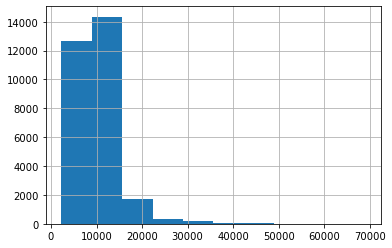

In [5]:
# Distribution of Prices

data['price'].hist()

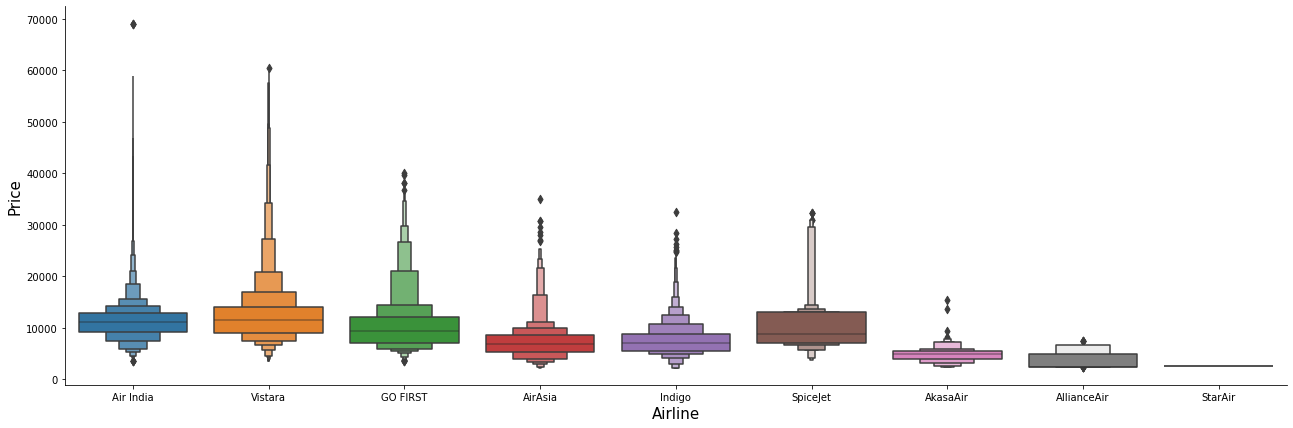

In [6]:
# Airline vs Price

sns.catplot(y = 'price', x = 'flight_name', data = data.sort_values('price', ascending=False),kind='boxen',height = 6, aspect = 3)
plt.xlabel('Airline',size=15)
plt.ylabel('Price',size=15)
plt.show()

# <h2>Feature Engineering / Data Preproccesing</h2>

In [7]:
data['dep_hour'] = pd.to_datetime(data['departure_time'].astype(str)).dt.hour
data['dep_min'] = pd.to_datetime(data['departure_time'].astype(str)).dt.minute
data

,flight_name,date,departure_time,departure_loc,flight_duration,stops,arrival_time,arrival_loc,price,dep_hour,dep_min
0,AirAsia,2023-05-01,06:05:00,Bangalore,01h 10m,non-stop,07:15:00,Hyderabad,2466,6,5
1,AirAsia,2023-05-01,07:45:00,Bangalore,01h 00m,non-stop,08:45:00,Hyderabad,2466,7,45
2,AkasaAir,2023-05-01,06:10:00,Bangalore,01h 20m,non-stop,07:30:00,Hyderabad,2330,6,10
3,AirAsia,2023-05-01,14:05:00,Bangalore,01h 10m,non-stop,15:15:00,Hyderabad,2954,14,5
4,AirAsia,2023-05-01,15:40:00,Bangalore,01h 10m,non-stop,16:50:00,Hyderabad,2954,15,40
...,...,...,...,...,...,...,...,...,...,...,...
29335,Vistara,2023-05-14,14:15:00,Delhi,07h 25m,1-stop,21:40:00,Mumbai,20760,14,15
29336,GO FIRST,2023-05-14,09:25:00,Delhi,09h 00m,1-stop,18:25:00,Mumbai,36485,9,25
29337,GO FIRST,2023-05-14,05:20:00,Delhi,13h 05m,1-stop,18:25:00,Mumbai,38060,5,20
29338,GO FIRST,2023-05-14,11:50:00,Delhi,06h 35m,1-stop,18:25:00,Mumbai,39635,11,50


In [8]:
data['arr_hour'] = pd.to_datetime(data['arrival_time'].astype(str)).dt.hour
data['arr_min'] = pd.to_datetime(data['arrival_time'].astype(str)).dt.minute
data

,flight_name,date,departure_time,departure_loc,flight_duration,stops,arrival_time,arrival_loc,price,dep_hour,dep_min,arr_hour,arr_min
0,AirAsia,2023-05-01,06:05:00,Bangalore,01h 10m,non-stop,07:15:00,Hyderabad,2466,6,5,7,15
1,AirAsia,2023-05-01,07:45:00,Bangalore,01h 00m,non-stop,08:45:00,Hyderabad,2466,7,45,8,45
2,AkasaAir,2023-05-01,06:10:00,Bangalore,01h 20m,non-stop,07:30:00,Hyderabad,2330,6,10,7,30
3,AirAsia,2023-05-01,14:05:00,Bangalore,01h 10m,non-stop,15:15:00,Hyderabad,2954,14,5,15,15
4,AirAsia,2023-05-01,15:40:00,Bangalore,01h 10m,non-stop,16:50:00,Hyderabad,2954,15,40,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29335,Vistara,2023-05-14,14:15:00,Delhi,07h 25m,1-stop,21:40:00,Mumbai,20760,14,15,21,40
29336,GO FIRST,2023-05-14,09:25:00,Delhi,09h 00m,1-stop,18:25:00,Mumbai,36485,9,25,18,25
29337,GO FIRST,2023-05-14,05:20:00,Delhi,13h 05m,1-stop,18:25:00,Mumbai,38060,5,20,18,25
29338,GO FIRST,2023-05-14,11:50:00,Delhi,06h 35m,1-stop,18:25:00,Mumbai,39635,11,50,18,25


In [9]:
data['Journey_Day'] = pd.to_datetime(data['date']).dt.day
data['Journey_Month'] = pd.to_datetime(data['date']).dt.month
data

,flight_name,date,departure_time,departure_loc,flight_duration,stops,arrival_time,arrival_loc,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month
0,AirAsia,2023-05-01,06:05:00,Bangalore,01h 10m,non-stop,07:15:00,Hyderabad,2466,6,5,7,15,1,5
1,AirAsia,2023-05-01,07:45:00,Bangalore,01h 00m,non-stop,08:45:00,Hyderabad,2466,7,45,8,45,1,5
2,AkasaAir,2023-05-01,06:10:00,Bangalore,01h 20m,non-stop,07:30:00,Hyderabad,2330,6,10,7,30,1,5
3,AirAsia,2023-05-01,14:05:00,Bangalore,01h 10m,non-stop,15:15:00,Hyderabad,2954,14,5,15,15,1,5
4,AirAsia,2023-05-01,15:40:00,Bangalore,01h 10m,non-stop,16:50:00,Hyderabad,2954,15,40,16,50,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29335,Vistara,2023-05-14,14:15:00,Delhi,07h 25m,1-stop,21:40:00,Mumbai,20760,14,15,21,40,14,5
29336,GO FIRST,2023-05-14,09:25:00,Delhi,09h 00m,1-stop,18:25:00,Mumbai,36485,9,25,18,25,14,5
29337,GO FIRST,2023-05-14,05:20:00,Delhi,13h 05m,1-stop,18:25:00,Mumbai,38060,5,20,18,25,14,5
29338,GO FIRST,2023-05-14,11:50:00,Delhi,06h 35m,1-stop,18:25:00,Mumbai,39635,11,50,18,25,14,5


In [10]:
data.drop(['date','departure_time','arrival_time'], axis = 1, inplace = True)
data

,flight_name,departure_loc,flight_duration,stops,arrival_loc,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month
0,AirAsia,Bangalore,01h 10m,non-stop,Hyderabad,2466,6,5,7,15,1,5
1,AirAsia,Bangalore,01h 00m,non-stop,Hyderabad,2466,7,45,8,45,1,5
2,AkasaAir,Bangalore,01h 20m,non-stop,Hyderabad,2330,6,10,7,30,1,5
3,AirAsia,Bangalore,01h 10m,non-stop,Hyderabad,2954,14,5,15,15,1,5
4,AirAsia,Bangalore,01h 10m,non-stop,Hyderabad,2954,15,40,16,50,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
29335,Vistara,Delhi,07h 25m,1-stop,Mumbai,20760,14,15,21,40,14,5
29336,GO FIRST,Delhi,09h 00m,1-stop,Mumbai,36485,9,25,18,25,14,5
29337,GO FIRST,Delhi,13h 05m,1-stop,Mumbai,38060,5,20,18,25,14,5
29338,GO FIRST,Delhi,06h 35m,1-stop,Mumbai,39635,11,50,18,25,14,5


In [11]:
data['stops'].value_counts()

1-stop                22278
non-stop               5317
2+-stop                1580
1-stopVia Indore         68
1-stopVia IDR            63
1-stopVia Mumbai         14
1-stopVia Delhi          12
1-stopVia VTZ             7
1-stopVia Bagdogra        1
Name: stops, dtype: int64

In [12]:
data.replace({'non-stop ' : 0, '1-stop' : 1, '1-stopVia Indore' : 1,'1-stopVia Mumbai' : 1, '2+-stop' : 2,'1-stopVia IDR' : 1,'1-stopVia VTZ' : 1,'1-stopVia Delhi' : 1,'1-stopVia Bagdogra' : 1}, inplace=True)
data

,flight_name,departure_loc,flight_duration,stops,arrival_loc,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month
0,AirAsia,Bangalore,01h 10m,0,Hyderabad,2466,6,5,7,15,1,5
1,AirAsia,Bangalore,01h 00m,0,Hyderabad,2466,7,45,8,45,1,5
2,AkasaAir,Bangalore,01h 20m,0,Hyderabad,2330,6,10,7,30,1,5
3,AirAsia,Bangalore,01h 10m,0,Hyderabad,2954,14,5,15,15,1,5
4,AirAsia,Bangalore,01h 10m,0,Hyderabad,2954,15,40,16,50,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
29335,Vistara,Delhi,07h 25m,1,Mumbai,20760,14,15,21,40,14,5
29336,GO FIRST,Delhi,09h 00m,1,Mumbai,36485,9,25,18,25,14,5
29337,GO FIRST,Delhi,13h 05m,1,Mumbai,38060,5,20,18,25,14,5
29338,GO FIRST,Delhi,06h 35m,1,Mumbai,39635,11,50,18,25,14,5


In [13]:
data['stops'].value_counts()

1    22443
0     5317
2     1580
Name: stops, dtype: int64

In [14]:
duration = list(data['flight_duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [15]:
data['Duration_hours'] = duration_hours
data['Duration_mins'] = duration_mins
data

,flight_name,departure_loc,flight_duration,stops,arrival_loc,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins
0,AirAsia,Bangalore,01h 10m,0,Hyderabad,2466,6,5,7,15,1,5,1,10
1,AirAsia,Bangalore,01h 00m,0,Hyderabad,2466,7,45,8,45,1,5,1,0
2,AkasaAir,Bangalore,01h 20m,0,Hyderabad,2330,6,10,7,30,1,5,1,20
3,AirAsia,Bangalore,01h 10m,0,Hyderabad,2954,14,5,15,15,1,5,1,10
4,AirAsia,Bangalore,01h 10m,0,Hyderabad,2954,15,40,16,50,1,5,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29335,Vistara,Delhi,07h 25m,1,Mumbai,20760,14,15,21,40,14,5,7,25
29336,GO FIRST,Delhi,09h 00m,1,Mumbai,36485,9,25,18,25,14,5,9,0
29337,GO FIRST,Delhi,13h 05m,1,Mumbai,38060,5,20,18,25,14,5,13,5
29338,GO FIRST,Delhi,06h 35m,1,Mumbai,39635,11,50,18,25,14,5,6,35


In [16]:
data.drop(['flight_duration'],axis=1,inplace=True)
data

,flight_name,departure_loc,stops,arrival_loc,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins
0,AirAsia,Bangalore,0,Hyderabad,2466,6,5,7,15,1,5,1,10
1,AirAsia,Bangalore,0,Hyderabad,2466,7,45,8,45,1,5,1,0
2,AkasaAir,Bangalore,0,Hyderabad,2330,6,10,7,30,1,5,1,20
3,AirAsia,Bangalore,0,Hyderabad,2954,14,5,15,15,1,5,1,10
4,AirAsia,Bangalore,0,Hyderabad,2954,15,40,16,50,1,5,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29335,Vistara,Delhi,1,Mumbai,20760,14,15,21,40,14,5,7,25
29336,GO FIRST,Delhi,1,Mumbai,36485,9,25,18,25,14,5,9,0
29337,GO FIRST,Delhi,1,Mumbai,38060,5,20,18,25,14,5,13,5
29338,GO FIRST,Delhi,1,Mumbai,39635,11,50,18,25,14,5,6,35


In [17]:
data['flight_name'].value_counts()

Vistara        8849
Air India      8691
Indigo         7625
AirAsia        1986
GO FIRST       1105
SpiceJet        635
AkasaAir        385
AllianceAir      58
StarAir           6
Name: flight_name, dtype: int64

In [18]:
Airline = data['flight_name']
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,AirAsia,AkasaAir,AllianceAir,GO FIRST,Indigo,SpiceJet,StarAir,Vistara
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [19]:
list1 = ['departure_loc', 'arrival_loc']
for l in list1:
    print(data[[l]].value_counts(), '\n')

departure_loc
Bangalore        9086
Delhi            6808
Mumbai           6781
Chennai          6665
dtype: int64 

arrival_loc
Delhi          7489
Kolkata        7175
Mumbai         7116
Hyderabad      5419
Bangalore      2141
dtype: int64 



In [20]:
data = pd.get_dummies(data = data, columns=list1, drop_first=True)
data

,flight_name,stops,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins,departure_loc_Chennai,departure_loc_Delhi,departure_loc_Mumbai,arrival_loc_Delhi,arrival_loc_Hyderabad,arrival_loc_Kolkata,arrival_loc_Mumbai
0,AirAsia,0,2466,6,5,7,15,1,5,1,10,0,0,0,0,1,0,0
1,AirAsia,0,2466,7,45,8,45,1,5,1,0,0,0,0,0,1,0,0
2,AkasaAir,0,2330,6,10,7,30,1,5,1,20,0,0,0,0,1,0,0
3,AirAsia,0,2954,14,5,15,15,1,5,1,10,0,0,0,0,1,0,0
4,AirAsia,0,2954,15,40,16,50,1,5,1,10,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29335,Vistara,1,20760,14,15,21,40,14,5,7,25,0,1,0,0,0,0,1
29336,GO FIRST,1,36485,9,25,18,25,14,5,9,0,0,1,0,0,0,0,1
29337,GO FIRST,1,38060,5,20,18,25,14,5,13,5,0,1,0,0,0,0,1
29338,GO FIRST,1,39635,11,50,18,25,14,5,6,35,0,1,0,0,0,0,1


In [21]:
data = pd.concat([data, Airline], axis = 1)
data

,flight_name,stops,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,...,arrival_loc_Kolkata,arrival_loc_Mumbai,AirAsia,AkasaAir,AllianceAir,GO FIRST,Indigo,SpiceJet,StarAir,Vistara
0,AirAsia,0,2466,6,5,7,15,1,5,1,...,0,0,1,0,0,0,0,0,0,0
1,AirAsia,0,2466,7,45,8,45,1,5,1,...,0,0,1,0,0,0,0,0,0,0
2,AkasaAir,0,2330,6,10,7,30,1,5,1,...,0,0,0,1,0,0,0,0,0,0
3,AirAsia,0,2954,14,5,15,15,1,5,1,...,0,0,1,0,0,0,0,0,0,0
4,AirAsia,0,2954,15,40,16,50,1,5,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29335,Vistara,1,20760,14,15,21,40,14,5,7,...,0,1,0,0,0,0,0,0,0,1
29336,GO FIRST,1,36485,9,25,18,25,14,5,9,...,0,1,0,0,0,1,0,0,0,0
29337,GO FIRST,1,38060,5,20,18,25,14,5,13,...,0,1,0,0,0,1,0,0,0,0
29338,GO FIRST,1,39635,11,50,18,25,14,5,6,...,0,1,0,0,0,1,0,0,0,0


In [22]:
data.drop(['flight_name'],axis=1,inplace=True)
data

,stops,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins,...,arrival_loc_Kolkata,arrival_loc_Mumbai,AirAsia,AkasaAir,AllianceAir,GO FIRST,Indigo,SpiceJet,StarAir,Vistara
0,0,2466,6,5,7,15,1,5,1,10,...,0,0,1,0,0,0,0,0,0,0
1,0,2466,7,45,8,45,1,5,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,2330,6,10,7,30,1,5,1,20,...,0,0,0,1,0,0,0,0,0,0
3,0,2954,14,5,15,15,1,5,1,10,...,0,0,1,0,0,0,0,0,0,0
4,0,2954,15,40,16,50,1,5,1,10,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29335,1,20760,14,15,21,40,14,5,7,25,...,0,1,0,0,0,0,0,0,0,1
29336,1,36485,9,25,18,25,14,5,9,0,...,0,1,0,0,0,1,0,0,0,0
29337,1,38060,5,20,18,25,14,5,13,5,...,0,1,0,0,0,1,0,0,0,0
29338,1,39635,11,50,18,25,14,5,6,35,...,0,1,0,0,0,1,0,0,0,0


# <h2>Feature Selection/Importance</h2>

In [23]:
data.shape

(29340, 25)

In [24]:
data.columns

Index(['stops', 'price', 'dep_hour', 'dep_min', 'arr_hour', 'arr_min',
       'Journey_Day', 'Journey_Month', 'Duration_hours', 'Duration_mins',
       'departure_loc_Chennai', 'departure_loc_Delhi', 'departure_loc_Mumbai',
       'arrival_loc_Delhi', 'arrival_loc_Hyderabad', 'arrival_loc_Kolkata',
       'arrival_loc_Mumbai', 'AirAsia', 'AkasaAir', 'AllianceAir', 'GO FIRST',
       'Indigo', 'SpiceJet', 'StarAir', 'Vistara'],
      dtype='object')

In [25]:
X = data.loc[:, ['stops', 'dep_hour', 'dep_min', 'arr_hour', 'arr_min',
       'Journey_Day', 'Journey_Month', 'Duration_hours', 'Duration_mins',
       'departure_loc_Chennai', 'departure_loc_Delhi', 'departure_loc_Mumbai',
       'arrival_loc_Delhi', 'arrival_loc_Hyderabad', 'arrival_loc_Kolkata',
       'arrival_loc_Mumbai', 'AirAsia', 'AkasaAir', 'AllianceAir', 'GO FIRST',
       'Indigo', 'SpiceJet', 'StarAir', 'Vistara']]
X.head()

,stops,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins,departure_loc_Chennai,...,arrival_loc_Kolkata,arrival_loc_Mumbai,AirAsia,AkasaAir,AllianceAir,GO FIRST,Indigo,SpiceJet,StarAir,Vistara
0,0,6,5,7,15,1,5,1,10,0,...,0,0,1,0,0,0,0,0,0,0
1,0,7,45,8,45,1,5,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,6,10,7,30,1,5,1,20,0,...,0,0,0,1,0,0,0,0,0,0
3,0,14,5,15,15,1,5,1,10,0,...,0,0,1,0,0,0,0,0,0,0
4,0,15,40,16,50,1,5,1,10,0,...,0,0,1,0,0,0,0,0,0,0


In [26]:
y = data.iloc[:, 1]
y.head()

0    2466
1    2466
2    2330
3    2954
4    2954
Name: price, dtype: int64

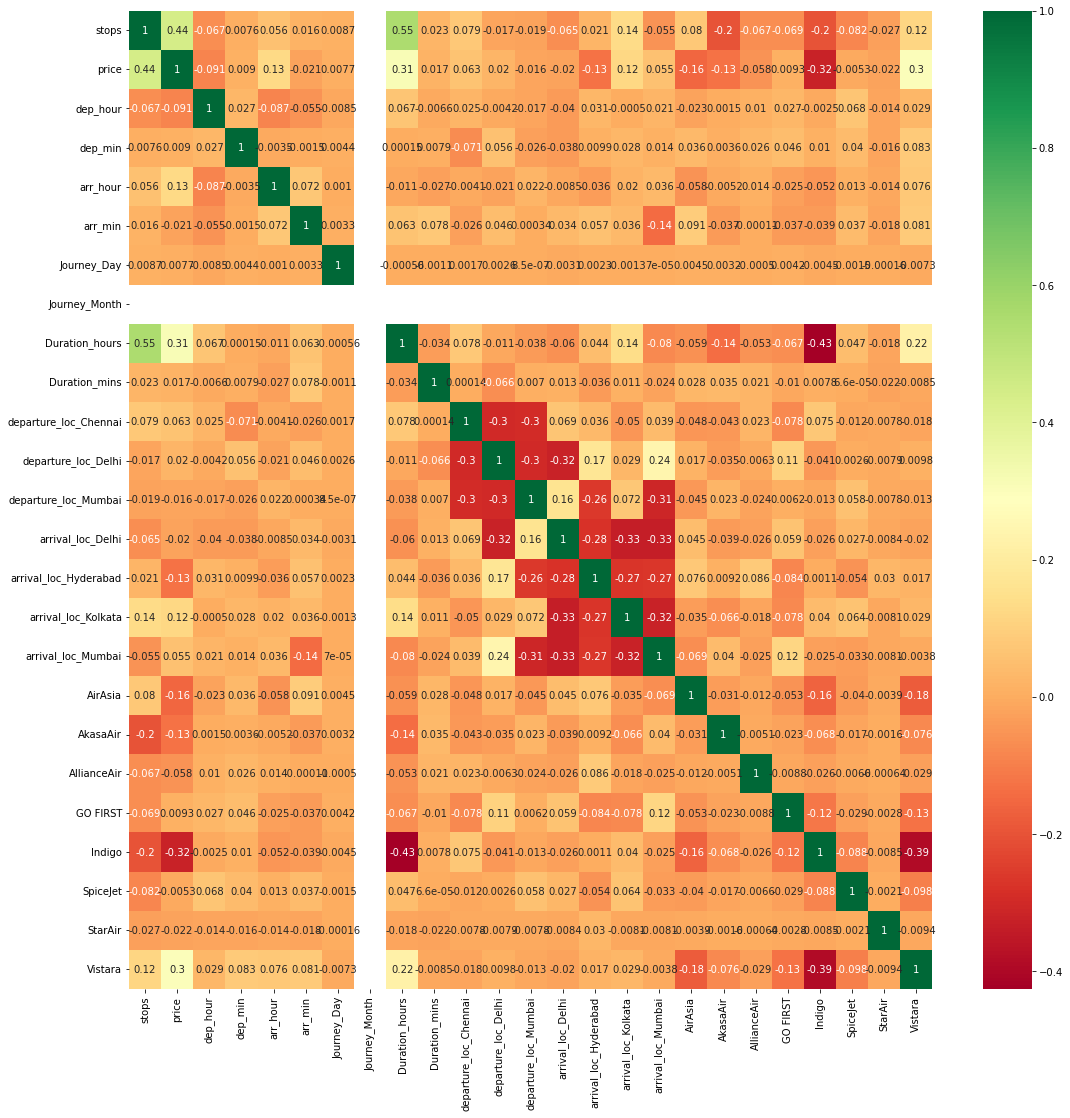

In [27]:
plt.figure(figsize = (18, 18))
sns.heatmap(data.corr(),annot = True, cmap = 'RdYlGn')

plt.show()

In [28]:
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [29]:
print(selection.feature_importances_)

[1.74542531e-01 4.24173341e-02 4.41072965e-02 6.35653928e-02
 7.15447409e-02 9.77777273e-02 0.00000000e+00 6.17646569e-02
 3.99493313e-02 2.33837108e-02 2.41494978e-02 1.66223197e-02
 1.41178841e-02 2.43482964e-02 2.44989675e-02 9.87049941e-02
 4.84895516e-02 1.53930934e-03 3.54289894e-04 4.96326835e-03
 8.97873095e-02 3.33398951e-03 8.13094463e-07 3.00367877e-02]


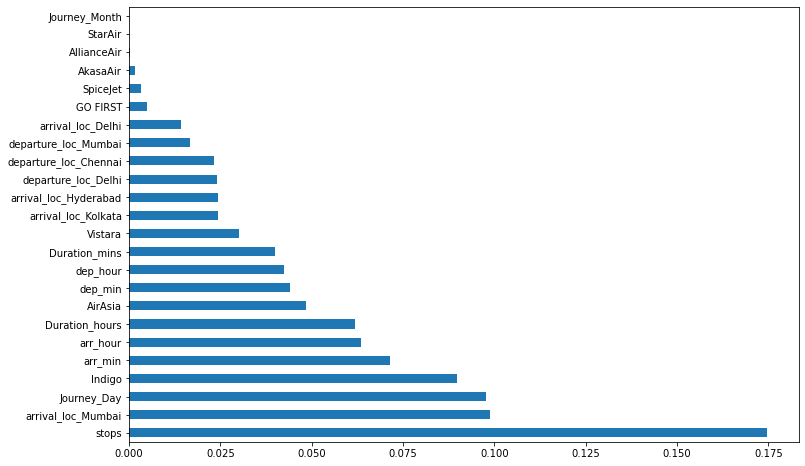

In [30]:
# Feature Importances

plt.figure(figsize = (12, 8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

# <h2>Feature Scaling</h2>

In [31]:
x = data.drop(['price'],axis=1)
y = data['price']

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data1 = scaler.fit_transform(x)

data1[0]

array([-1.86534296, -1.18865984, -1.09079458, -1.10153261, -0.65043734,
       -1.62863829,  0.        , -1.26519046, -0.9669244 , -0.5421587 ,
       -0.54967996, -0.54826049, -0.58543173,  2.10101953, -0.56895391,
       -0.56585721,  3.71125503, -0.11531043, -0.04450549, -0.19782776,
       -0.59257047, -0.14873326, -0.01430178, -0.65715153])

In [33]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=123)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((20538, 24), (8802, 24), (20538,), (8802,))

# <h2><center>ExtraTreesRegressor Model</center></h2>

In [34]:
selection = ExtraTreesRegressor()
selection.fit(x_train, y_train)

ExtraTreesRegressor()

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared_Value:', r2_score(y_true, y_pred))
    
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

In [36]:
y_pred = selection.predict(x_test)

In [37]:
metrics(y_test, y_pred)

RMSE: 1711.8399001773773
R_Squared_Value: 0.8789282382457326


In [38]:
accuracy(y_test, y_pred)

91.49565429884589

# <h2><center>Linear Regression Model</center></h2>

In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared_Value:', r2_score(y_true, y_pred))
    
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

In [41]:
y_pred = model.predict(x_test)

In [42]:
metrics(y_test, y_pred)

RMSE: 3896.9628565714847
R_Squared_Value: 0.37256447419577876


In [43]:
accuracy(y_test, y_pred)

73.008557878178

C:\Users\kunal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


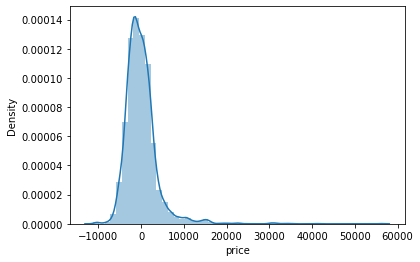

In [44]:
sns.distplot(y_test-y_pred)
plt.show()

# <h2><center>XGBoost Model</center></h2>

In [45]:
import xgboost as xg

In [46]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)

In [47]:
xgb_r.fit(x_train, y_train)

[11:27:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [48]:
pred = xgb_r.predict(x_test)

In [49]:
from sklearn.metrics import mean_squared_error as MSE

In [50]:
metrics(y_test, pred)

RMSE: 2806.738192870705
R_Squared_Value: 0.674522942506937


In [51]:
accuracy(y_test, pred)

83.55805135936012

C:\Users\kunal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


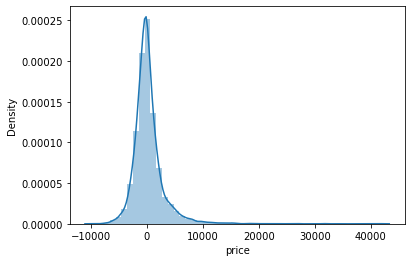

In [52]:
sns.distplot(y_test-pred)
plt.show()

# <center>Random Forest Model</center>

In [53]:
from sklearn.ensemble import RandomForestRegressor

model_random_forest = RandomForestRegressor(n_estimators = 100, min_samples_split=3)
model_random_forest.fit(x_train, y_train)

RandomForestRegressor(min_samples_split=3)

In [54]:
pred_rf = model_random_forest.predict(x_test)

In [55]:
metrics(y_test, pred_rf)

RMSE: 1593.5030379313807
R_Squared_Value: 0.8950886769857496


In [56]:
accuracy(y_test, pred_rf)

91.51842022604238

C:\Users\kunal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


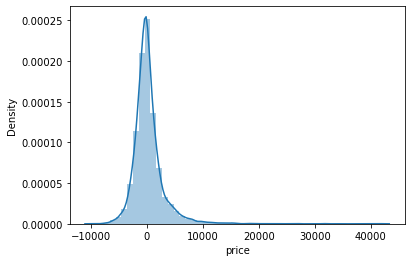

In [57]:
sns.distplot(y_test-pred)
plt.show()

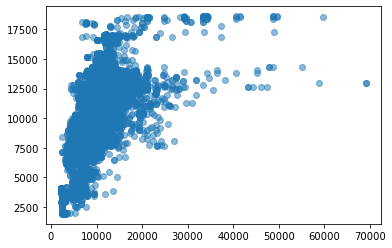

In [58]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.show()

# <h2>Saving the File</h2>

In [59]:
import pickle

In [60]:
model = model_random_forest
pickle.dump(model, open("flight.pkl",'wb'))